In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv("iris.data.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
X = data.drop('class', axis="columns")
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
y = data['class']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [36]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [37]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [38]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Create PDP for 'sepal_length'
feature_name = 'sepal_length'
sepal_length_values = sorted(X_train[feature_name].unique())  # Use unique values of 'sepal_length'
print(sepal_length_values)

[4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.6, 7.7]


In [40]:
# Make a copy of the dataset to modify only the 'sepal_length' column
X_temp = X_train.copy()

In [41]:
# Initialize a list to store predictions
pdp_values = []

In [42]:

# Iterate over unique values of 'sepal_length'
for value in sepal_length_values:
    X_temp[feature_name] = value  # Set 'sepal_length' to the current value for all samples
    print(X_temp)
    prediction = model.predict(X_temp)  # Predict using the modified dataset
    pdp_values.append(np.mean(prediction))  # Store the average prediction

     sepal_length  sepal_width  petal_length  petal_width
22            4.3          3.6           1.0          0.2
15            4.3          4.4           1.5          0.4
65            4.3          3.1           4.4          1.4
11            4.3          3.4           1.6          0.2
42            4.3          3.2           1.3          0.2
..            ...          ...           ...          ...
71            4.3          2.8           4.0          1.3
106           4.3          2.5           4.5          1.7
14            4.3          4.0           1.2          0.2
92            4.3          2.6           4.0          1.2
102           4.3          3.0           5.9          2.1

[120 rows x 4 columns]
     sepal_length  sepal_width  petal_length  petal_width
22            4.4          3.6           1.0          0.2
15            4.4          4.4           1.5          0.4
65            4.4          3.1           4.4          1.4
11            4.4          3.4           1.6    

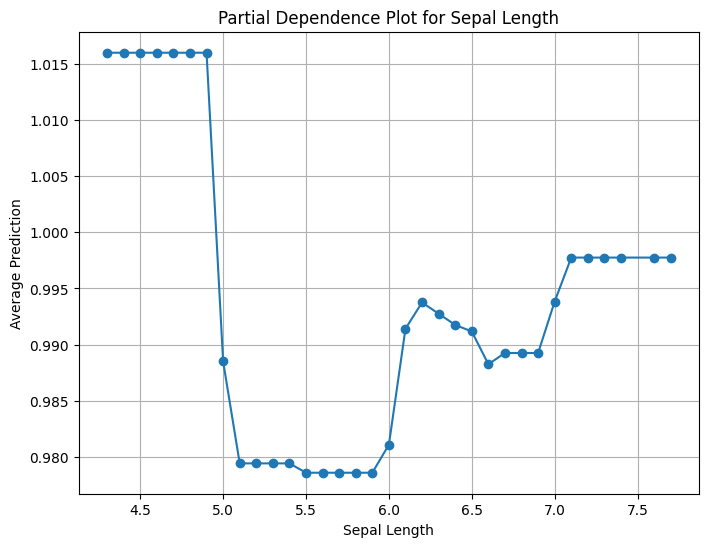

In [43]:
# Plotting the Partial Dependence Plot
plt.figure(figsize=(8, 6))
plt.plot(sepal_length_values, pdp_values, marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Average Prediction')
plt.title('Partial Dependence Plot for Sepal Length')
plt.grid(True)
plt.show()